# Statistical Analysis of Groups (t-student testing)

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import ttest_ind, ttest_rel, sem, t, chi2_contingency
from scipy.stats.contingency import expected_freq
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [67]:
data_path = "../../resources/nl-experiment1/transformed-data/nl-experiment-01-revised.csv"
nl_data = pd.read_csv(data_path)

In [68]:
nl_data

,CTYPE,USER,CASEN,ANSWER_DESC,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,ANSWER_EKG,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
0,DF,61,Case-01,acs,1.0,60,116.29,nstemi,1.0,85,44.17
1,DF,61,Case-02,gastrointestinal,1.0,85,102.18,gastrointestinal,1.0,65,101.37
2,DF,61,Case-03,tendomyogenic,1.0,85,81.42,tendomyogenic,1.0,85,31.00
3,DF,61,Case-07,pericarditis,1.0,50,67.92,pericarditis,1.0,91,34.73
4,DF,61,Case-08,acs,1.0,70,49.27,acs,1.0,90,33.66
...,...,...,...,...,...,...,...,...,...,...,...
584,EF,116,Case-13,nstemi,1.0,80,32.83,nstemi (neg t inf),1.0,70,55.83
585,EF,116,Case-15,nstemi,1.0,77,58.47,gb,0.0,60,26.95
586,EF,116,Case-16,nstemi,1.0,85,36.39,oud inf infarct en nstemi,0.5,65,48.28
587,EF,116,Case-17,nstemi,0.5,80,44.04,kort pr interval en nstemi,0.0,69,47.32


In [69]:
nl_data.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,87.455008,0.740238,64.312394,61.508438,0.623090,60.237691,51.955331
std,15.927347,0.414976,19.538577,37.271248,0.447643,22.418436,31.064419
min,61.000000,0.000000,3.000000,8.880000,0.000000,0.000000,6.870000
25%,73.000000,0.500000,52.000000,36.460000,0.000000,45.000000,29.420000
50%,88.000000,1.000000,66.000000,52.300000,1.000000,61.000000,45.770000
75%,101.000000,1.000000,79.000000,76.630000,1.000000,77.000000,66.260000
max,116.000000,1.000000,100.000000,420.380000,1.000000,100.000000,226.960000


## Number of participants in the experiment n=52, Group Description First n=24, Group EKG first n=28

## Splitting Data in Description and EKG groups

In [70]:
df_group = nl_data[nl_data.CTYPE == "DF"]
df_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,73.000000,0.732270,63.354610,60.662270,0.750000,66.609929,40.017872
std,7.423633,0.428256,19.164445,31.372969,0.402947,21.742025,21.469140
min,61.000000,0.000000,3.000000,8.880000,0.000000,0.000000,8.570000
25%,66.000000,0.500000,51.000000,39.052500,0.500000,54.250000,24.082500
50%,73.000000,1.000000,64.500000,53.645000,1.000000,69.000000,34.860000
75%,80.000000,1.000000,75.750000,76.532500,1.000000,81.750000,51.917500
max,85.000000,1.000000,100.000000,181.100000,1.000000,100.000000,108.690000


In [71]:
ef_group = nl_data[nl_data.CTYPE == "EF"]
ef_group.describe()

,USER,POINTS_DESC,CONFIDENCE_DESC,TIME_DESC,POINTS_EKG,CONFIDENCE_EKG,TIME_EKG
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,100.732899,0.747557,65.192182,62.285700,0.506515,54.384365,62.920684
std,8.210884,0.402953,19.866520,42.002663,0.455493,21.444460,34.337809
min,86.000000,0.000000,3.000000,14.760000,0.000000,1.000000,6.870000
25%,94.000000,0.500000,53.500000,34.660000,0.000000,37.500000,38.070000
50%,101.000000,1.000000,68.000000,50.420000,0.500000,57.000000,55.950000
75%,107.000000,1.000000,80.000000,76.320000,1.000000,70.000000,78.280000
max,116.000000,1.000000,100.000000,420.380000,1.000000,100.000000,226.960000


## Degree of confidence of mean values

In [72]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, h

### Time Mean

In [73]:
df_group_mean_dtime, df_group_sem_dtime = mean_confidence_interval(df_group["TIME_DESC"])
print("Group 1 description time mean {} +/- {}".format(round(df_group_mean_dtime, 2), round(df_group_sem_dtime, 2)))

Group 1 description time mean 60.66 +/- 3.68


In [74]:
df_group_mean_etime, df_group_sem_etime = mean_confidence_interval(df_group["TIME_EKG"])
print("Group 1 EKG time mean {} +/- {}".format(round(df_group_mean_etime, 2), round(df_group_sem_etime, 2)))

Group 1 EKG time mean 40.02 +/- 2.52


In [75]:
ef_group_mean_etime, ef_group_sem_etime = mean_confidence_interval(ef_group["TIME_EKG"])
print("Group 2 EKG time mean {} +/- {}".format(round(ef_group_mean_etime, 2), round(ef_group_sem_etime, 2)))

Group 2 EKG time mean 62.92 +/- 3.86


In [76]:
ef_group_mean_dtime, ef_group_sem_dtime = mean_confidence_interval(ef_group["TIME_DESC"])
print("Group 2 description time mean {} +/- {}".format(round(ef_group_mean_dtime, 2), round(ef_group_sem_dtime, 2)))

Group 2 description time mean 62.29 +/- 4.72


### Confidence Mean

In [77]:
df_group_mean_dconf, df_group_sem_dconf = mean_confidence_interval(df_group["CONFIDENCE_DESC"])
print("Group 1 description confidence mean {} +/- {}".format(round(df_group_mean_dconf, 2), round(df_group_sem_dconf, 2)))

Group 1 description confidence mean 63.35 +/- 2.25


In [78]:
df_group_mean_econf, df_group_sem_econf = mean_confidence_interval(df_group["CONFIDENCE_EKG"])
print("Group 1 EKG confidence mean {} +/- {}".format(round(df_group_mean_econf, 2), round(df_group_sem_econf, 2)))

Group 1 EKG confidence mean 66.61 +/- 2.55


In [79]:
ef_group_mean_econf, ef_group_sem_econf = mean_confidence_interval(ef_group["CONFIDENCE_EKG"])
print("Group 2 EKG confidence mean {} +/- {}".format(round(ef_group_mean_econf, 2), round(ef_group_sem_econf, 2)))

Group 2 EKG confidence mean 54.38 +/- 2.41


In [80]:
ef_group_mean_dconf, ef_group_sem_dconf = mean_confidence_interval(ef_group["CONFIDENCE_DESC"])
print("Group 2 description confidence mean {} +/- {}".format(round(ef_group_mean_dconf, 2), round(ef_group_sem_dconf, 2)))

Group 2 description confidence mean 65.19 +/- 2.23


### Accuracy Mean

In [81]:
df_group_mean_dpoints, df_group_sem_dpoints = mean_confidence_interval(df_group["POINTS_DESC"])
print("Group 1 description points mean {} +/- {}".format(round(df_group_mean_dpoints, 2), round(df_group_sem_dpoints, 2)))

Group 1 description points mean 0.73 +/- 0.05


In [82]:
df_group_mean_epoints, df_group_sem_epoints = mean_confidence_interval(df_group["POINTS_EKG"])
print("Group 1 EKG points mean {} +/- {}".format(round(df_group_mean_epoints, 2), round(df_group_sem_epoints, 2)))

Group 1 EKG points mean 0.75 +/- 0.05


In [83]:
ef_group_mean_epoints, ef_group_sem_epoints = mean_confidence_interval(ef_group["POINTS_EKG"])
print("Group 2 EKG points mean {} +/- {}".format(round(ef_group_mean_epoints, 2), round(ef_group_sem_epoints, 2)))

Group 2 EKG points mean 0.51 +/- 0.05


In [84]:
ef_group_mean_dpoints, ef_group_sem_dpoints = mean_confidence_interval(ef_group["POINTS_DESC"])
print("Group 2 description points mean {} +/- {}".format(round(ef_group_mean_dpoints, 2), round(ef_group_sem_dpoints, 2)))

Group 2 description points mean 0.75 +/- 0.05


# Hypothesis testing for total time in a case

In [85]:
df_group.loc[:, "TIME_CASE"] = df_group["TIME_DESC"] + df_group["TIME_EKG"]
# df_group.describe()

/home/marcosf/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/marcosf/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [86]:
ef_group.loc[:, "TIME_CASE"] = ef_group["TIME_DESC"] + ef_group["TIME_EKG"]
# ef_group.describe()

### Here we can check that the time in a case is statiscally different between the two groups  ($t = -5.91, p = 5.84^{-9}$)

In [87]:
ttest_total_time = ttest_ind(df_group["TIME_CASE"], ef_group["TIME_CASE"])
print("t-value = {}, p-value = {}".format(ttest_total_time[0], ttest_total_time[1]))

t-value = -5.9088788134998325, p-value = 5.8402800077186535e-09


### Here we can check that the time in the first round NOT is statiscally different (p < 0.05) between the two groups ($t = -0.83, p = 0.41$)

In [88]:
ttest_total_time = ttest_ind(df_group["TIME_DESC"], ef_group["TIME_EKG"])
print("t-value = {}, p-value = {}".format(ttest_total_time[0], ttest_total_time[1]))

t-value = -0.8309220181763984, p-value = 0.4063555264343799


### Here we can check that the time at the second round is statiscally different between the two groups ($t = -7.99, p = 6.93^{-15}$) 

In [89]:
ttest_total_time = ttest_ind(df_group["TIME_EKG"], ef_group["TIME_DESC"])
print("t-value = {}, p-value = {}".format(ttest_total_time[0], ttest_total_time[1]))

t-value = -7.994645298350919, p-value = 6.932739836965142e-15


## T-test for Time in the same task (Group 1 and Group 2 = Time in Description, Group 1 and Group 2 = Time in EKG)

In [90]:
ttest_desc_time = ttest_ind(df_group["TIME_DESC"], ef_group["TIME_DESC"])
print("Time on Description task t-value = {}, p-value = {}".format(ttest_desc_time[0], ttest_desc_time[1]))

Time on Description task t-value = -0.5277513410148111, p-value = 0.5978713597597857


In [91]:
ttest_ekg_time = ttest_ind(df_group["TIME_EKG"], ef_group["TIME_EKG"])
print("Time on EKG task t-value = {}, p-value = {}".format(ttest_ekg_time[0], ttest_ekg_time[1]))

Time on EKG task t-value = -9.607364701597685, p-value = 2.1439726381993676e-20


## Confidence on same task t test 

In [92]:
ttest_desc_conf = ttest_ind(df_group["CONFIDENCE_DESC"], ef_group["CONFIDENCE_DESC"])
print("Confidence on Description task: t-value = {}, p-value = {}".format(ttest_desc_conf[0], ttest_desc_conf[1]))

Confidence on Description task: t-value = -1.140508922648709, p-value = 0.2545394498718527


In [93]:
ttest_ekg_conf = ttest_ind(df_group["CONFIDENCE_EKG"], ef_group["CONFIDENCE_EKG"])
print("Confidence on EKG task: t-value = {}, p-value = {}".format(ttest_ekg_conf[0], ttest_ekg_conf[1]))

Confidence on EKG task: t-value = 6.866008223308817, p-value = 1.685036108100445e-11


## Final confidence Hypothesis Test

In [94]:
ttest_final_conf = ttest_ind(df_group["CONFIDENCE_EKG"], ef_group["CONFIDENCE_DESC"])
print("t-value = {}, p-value = {}".format(ttest_final_conf[0], ttest_final_conf[1]))

t-value = 0.8269420674747929, p-value = 0.4086059170241658


### This test allows us to check weather the order of presentation change the confidence on the final answer of the student. Therefore a t-test applied to the confidence on EKG round for the Description First Group and confidence on Description round for EKG First Group. The test result is p > 0.05, a value that can not be used to reject H0.

## Paired t-test to check if students changed confidence between stages

In [95]:
ttest_p_df = ttest_rel(df_group["CONFIDENCE_DESC"], df_group["CONFIDENCE_EKG"])
print("t-test paired confidence group 1: t-value = {}, p-value = {}".format(ttest_p_df[0], ttest_p_df[1]))

t-test paired confidence group 1: t-value = -2.9765229135604847, p-value = 0.003169173557347636


In [96]:
ttest_p_ef = ttest_rel(ef_group["CONFIDENCE_EKG"], ef_group["CONFIDENCE_DESC"])
print("t-test paired confidence group 2: t-value = {}, p-value = {}".format(ttest_p_ef[0], ttest_p_ef[1]))

t-test paired confidence group 2: t-value = -8.63193804006805, p-value = 3.3612108669425784e-16


## Chi squared test

In [97]:
df_group_always_right = len(df_group[(df_group["POINTS_DESC"] == 1.0) & (df_group["POINTS_EKG"] == 1.0)])

df_group_changed_right = len(df_group[((df_group["POINTS_DESC"] == 0.0) | (df_group["POINTS_DESC"] == 0.5)) & (df_group["POINTS_EKG"] == 1.0)])

df_group_changed_wrong = len(df_group[(df_group["POINTS_DESC"] == 1.0) & ((df_group["POINTS_EKG"] == 0.0) | (df_group["POINTS_EKG"] == 0.5))])

df_group_stayed_wrong = len(df_group[((df_group["POINTS_DESC"] == 0.0) | (df_group["POINTS_DESC"] == 0.5)) & ((df_group["POINTS_EKG"] == 0.0) | (df_group["POINTS_EKG"] == 0.5))])

In [98]:
ef_group_always_right = len(ef_group[(ef_group["POINTS_EKG"] == 1.0) & (ef_group["POINTS_DESC"] == 1.0)])

ef_group_changed_right = len(ef_group[((ef_group["POINTS_EKG"] == 0.0) | (ef_group["POINTS_EKG"] == 0.5)) & (ef_group["POINTS_DESC"] == 1.0)])

ef_group_changed_wrong = len(ef_group[(ef_group["POINTS_EKG"] == 1.0) & ((ef_group["POINTS_DESC"] == 0.0) | (ef_group["POINTS_DESC"] == 0.5))])

ef_group_stayed_wrong = len(ef_group[((ef_group["POINTS_EKG"] == 0.0) | (ef_group["POINTS_EKG"] == 0.5)) & ((ef_group["POINTS_DESC"] == 0.0) | (ef_group["POINTS_DESC"] == 0.5))])

In [99]:
cont_table_group1 = [df_group_always_right, df_group_changed_right, df_group_changed_wrong, df_group_stayed_wrong]
cont_table_group1

[179, 18, 20, 65]

In [100]:
cont_table_group2 = [ef_group_always_right, ef_group_changed_right, ef_group_changed_wrong, ef_group_stayed_wrong]
cont_table_group2

[107, 106, 22, 72]

In [101]:
contingency_table = [cont_table_group1, cont_table_group2]
contingency_table

[[179, 18, 20, 65], [107, 106, 22, 72]]

In [102]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print("===Chi2 Stat===")
print(chi2)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(pval)
print("\n")
print("===Contingency Table===")
print(expected)

===Chi2 Stat===
80.11359850081178


===Degrees of Freedom===
3


===P-Value===
2.90181188587557e-17


===Contingency Table===
[[136.93039049  59.36842105  20.10865874  65.59252971]
 [149.06960951  64.63157895  21.89134126  71.40747029]]


## Least-Squares line fitting to see how initial confidence affects time in second round

In [103]:
init_conf_and_final_time = pd.DataFrame(columns=["CONF", "TIME"])
init_conf_and_final_time["CONF"] = df_group["CONFIDENCE_DESC"].append(ef_group["CONFIDENCE_EKG"])

In [104]:
init_conf_and_final_time["TIME"] = df_group["TIME_EKG"].append(ef_group["TIME_DESC"])

In [105]:
init_conf_and_final_time

,CONF,TIME
0,60,44.17
1,85,101.37
2,85,31.00
3,50,34.73
4,70,33.66
...,...,...
584,70,32.83
585,60,58.47
586,65,36.39
587,69,44.04


In [106]:
array_conf_time = init_conf_and_final_time.to_numpy()
x = array_conf_time[:,0]
X = x.reshape((-1,1))
y = array_conf_time[:,1]


model = LinearRegression().fit(X,y)

b = model.intercept_
c = model.coef_
print("Coeficient = {}, Bias = {}".format(c[0], b))

Coeficient = -0.042379942776061635, Bias = 54.111180954543705


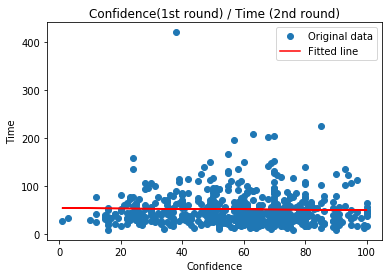

In [107]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=6)
_ = plt.plot(x, c*x + b, 'r', label='Fitted line')
_ = plt.xlabel("Confidence")
_ = plt.ylabel("Time")
_ = plt.title("Confidence(1st round) / Time (2nd round)")
_ = plt.legend()
plt.savefig("Conf_Time.png")
plt.show()

### The coeficient with negative (c = -0.042) value indicates that high confidence in the initial round correlates with small time in the second time. The difference is small, thus the same analysis separating by groups allows better analysis. 

In [108]:
array_conf_time = df_group[["CONFIDENCE_DESC", "TIME_EKG"]].to_numpy()
x = array_conf_time[:,0]
X = x.reshape((-1,1))
y = array_conf_time[:,1]


model = LinearRegression().fit(X,y)

b = model.intercept_
c = model.coef_
print("Coeficient = {}, Bias = {}".format(c[0], b))

Coeficient = -0.09705956085278568, Bias = 46.16704295814137


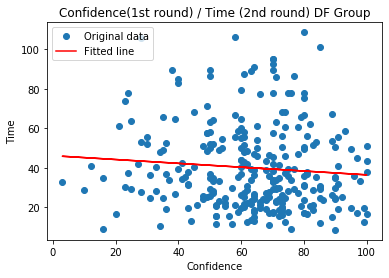

In [109]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=6)
_ = plt.plot(x, c*x + b, 'r', label='Fitted line')
_ = plt.xlabel("Confidence")
_ = plt.ylabel("Time")
_ = plt.title("Confidence(1st round) / Time (2nd round) DF Group")
_ = plt.legend()
plt.savefig("Conf_Time_DF.png")
plt.show()

In [110]:
array_conf_time = ef_group[["CONFIDENCE_EKG", "TIME_DESC"]].to_numpy()
x = array_conf_time[:,0]
X = x.reshape((-1,1))
y = array_conf_time[:,1]


model = LinearRegression().fit(X,y)

b = model.intercept_
c = model.coef_
print("Coeficient = {}, Bias = {}".format(c[0], b))

Coeficient = 0.2028031706208689, Bias = 51.25637870786311


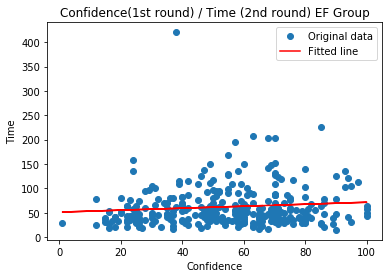

In [111]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=6)
_ = plt.plot(x, c*x + b, 'r', label='Fitted line')
_ = plt.xlabel("Confidence")
_ = plt.ylabel("Time")
_ = plt.title("Confidence(1st round) / Time (2nd round) EF Group")
_ = plt.legend()
plt.savefig("Conf_Time_EF.png")
plt.show()